In [21]:
import os
from deepface import DeepFace
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [22]:
ex = "ex.jpg"

In [23]:
goslings = []
for dirpath,dirname,filenames in os.walk("ryangosling/"):
    for filename in filenames:
        if ".jpg" in filename:
            goslings.append(dirpath + filename)

In [24]:
goslings

['ryangosling/barbieryan.jpg',
 'ryangosling/bladerunnerryan.jpg',
 'ryangosling/driveryan.jpg',
 'ryangosling/lalalandryan.jpg',
 'ryangosling/obamagosling.jpg',
 'ryangosling/placebeyondthepinesryan.jpg']

In [25]:
sim = {}
for gosling in goslings:
    x = DeepFace.verify(img1_path = gosling, img2_path = ex,
                        model_name = "Facenet", detector_backend = "mtcnn",
                        distance_metric = "euclidean")
    sim[gosling] = x["distance"]

1/1 [==============================] - 0s 22ms/step


In [26]:
df = pd.DataFrame(sim.items(), columns=["gosling","distance"])

In [27]:
df = df.sort_values(by = ["distance"])

In [28]:
df

,gosling,distance
3,ryangosling/lalalandryan.jpg,10.244991
5,ryangosling/placebeyondthepinesryan.jpg,10.748852
4,ryangosling/obamagosling.jpg,12.365567
0,ryangosling/barbieryan.jpg,13.239563
1,ryangosling/bladerunnerryan.jpg,13.259692
2,ryangosling/driveryan.jpg,13.549190


In [34]:
img_name = df.iloc[0]["gosling"]
img = cv2.imread(img_name)

ex_img = cv2.imread(ex)

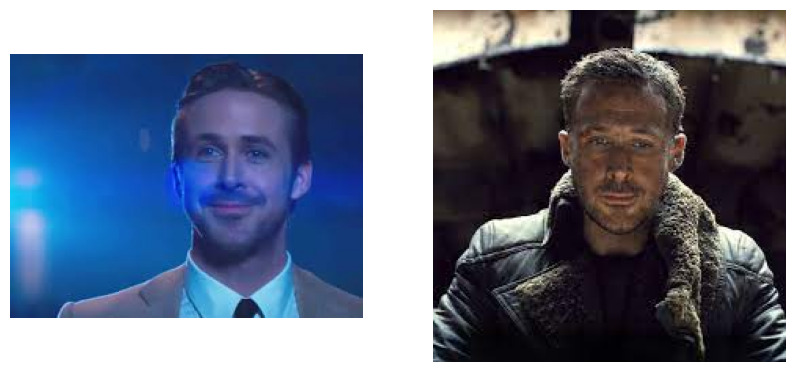

In [36]:
fig = plt.figure(figsize =(10,10))
                 
ax1 = fig.add_subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.axis("off")

ax2 = fig.add_subplot(1,2,2)
plt.imshow(ex_img[:,:,::-1])
plt.axis("off")
                 
plt.show()